In [89]:
import pandas as pd
data = pd.read_excel("D://bikram//machine learning//MachineLearningAllMaterials//data//RegressionData2.xlsx",)
import matplotlib.pyplot as plt
import numpy as np
X = data.iloc[:,:-1].values
y= data.iloc[:,2].values



In [90]:
def normalize(X):
    (m,n) = X.shape
    norm = np.zeros((m,n))
    mean = np.zeros((1,n))
    std = np.zeros((1,n))
    for i in range(n):
        norm[:,i] =( X[:,i] - np.mean(X[:,i]))/(np.max(X[:,i]) - np.min(X[:,i]))
        mean[0,i] = np.mean(X[:,i])
        std[0,i] = np.max(X[:,i]) - np.min(X[:,i])
    return norm, mean, std

In [91]:
X,mean, std = normalize(X)


In [92]:
def computeCost(X, y, theta):
    m,n = X.shape
    h = np.dot(X,theta)
    delta=0
    for i in range(m):
        delta += (h[i]-y[i])**2     
    cost = 1/(2*m)*delta
    return cost

In [93]:
def gradientDescent(X,y, theta,alpha, iteration):
    m,n = X.shape
    h = np.dot(X,theta)
    delta = np.zeros((m,1))
    cost = np.zeros((iteration,1))
    thetaArr = np.zeros((iteration,n))
    for i in range(iteration):
        pred = np.dot(X,theta) 
        for j in range(m):
            delta[j] = (pred[j]-y[j])  
        theta = theta - (alpha /m) * np.dot(X.T,delta)
        cost[i] = computeCost(inputX, y, theta)
        thetaArr[i] = theta.T
    return theta,cost,thetaArr

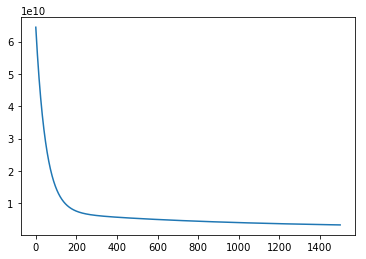

In [94]:
m,n = X.shape
theta = np.zeros((n+1,1))
ones = np.ones([m,1])
inputX = np.concatenate((ones,X), axis=1)
theta,cost,thetaArr = gradientDescent(inputX, y, theta, 0.01,1500)
plt.plot(cost)
plt.show()

In [95]:
theta, mean, std

(array([[ 340412.56301439],
        [ 233166.30458576],
        [  81960.74883517]]),
 array([[ 2000.68085106,     3.17021277]]),
 array([[ 3626.,     4.]]))

In [137]:
inputX =np.array( [[ 1,1650, 3]])
inputX.shape

(1, 3)

In [138]:
inputX[:,1] = (inputX[:,1] - mean[:,0])/ std[:,0]

In [139]:
 inputX[:,2] = (inputX[:,2] - mean[:,1])/ std[:,1]

In [121]:
inputX


array([[1, 0, 0]])

In [125]:
np.dot(inputX,theta)


array([[ 340412.56301439]])

In [133]:
##Normal Equation
m,n = X.shape
thetaNorm = np.zeros((n+1,1))
ones = np.ones([m,1])
inputX = np.concatenate((ones,X), axis=1)
thetaNorm =np.dot(np.linalg.inv(np.dot(inputX.T,inputX)) , (np.dot(inputX.T,y)))

In [135]:
thetaNorm

array([ 340412.65957447,  504777.90398791,  -34952.07644931])

In [140]:
np.dot(inputX,thetaNorm)

array([ 340412.65957447])

In [142]:
inputX
theta

array([[ 340412.56301439],
       [ 233166.30458576],
       [  81960.74883517]])